In [ ]:
!python -m spacy download el_core_news_sm

In [2]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
nlp = spacy.load('el_core_news_sm')

In [5]:
avgi_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/avgi_full_articles_tempi_2023_1-7_3_2023.csv')
avgi_df.head()


,site,url,section,title,date,author,full_text
0,avgi.gr,https://www.avgi.gr//politiki/441613_metathesi...,ΠΟΛΙΤΙΚΗ,Μαξίμου / Μετάθεση των εκλογών λόγω της λαϊκή...,08.03.23 07:30,Κώστας Σαββόπουλος,Την 21η Μαΐου δείχνει πλέον η κυβερνητική πυξί...
1,avgi.gr,https://www.avgi.gr//koinonia/441575_dekades-k...,ΚΟΙΝΩΝΙΑ,Τέμπη / Δεκάδες καταλήψεις σε πανεπιστήμια - ...,08.03.23 00:02,Αυγή Newsroom,Το κίνημα που διεκδικεί το δικαίωμα στην ζωή κ...
2,avgi.gr,https://www.avgi.gr//koinonia/441566_pos-apofe...,ΚΟΙΝΩΝΙΑ,Σέρρες / Πώς αποφεύχθηκε τελευταία στιγμή σύγ...,07.03.23 22:28,Αυγή Newsroom,Λίγες μέρες μετά την πολύνεκρη τραγωδία στα Τέ...
3,avgi.gr,https://www.avgi.gr//koinonia/441565_i-elas-kl...,ΚΟΙΝΩΝΙΑ,Απεργία / Η ΕΛΑΣ κλείνει τους πιο κεντρικούς ...,07.03.23 21:56,Αυγή Newsroom,Κλείνει κεντρικούς σταθμούς του Μετρό η Αστυνο...
4,avgi.gr,https://www.avgi.gr//koinonia/441564_apergiako...,ΚΟΙΝΩΝΙΑ,Τέμπη / Απεργιακό «ποτάμι» σε όλη τη χώρα την...,07.03.23 21:35,Αυγή Newsroom,Μεγαλώνει το κύμα οργής κατά της κυβέρνησης με...


In [6]:
avgi_df.loc[0, 'date']

'08.03.23 07:30'

In [7]:
avgi_df['date'] = pd.to_datetime(avgi_df['date'], format='%d.%m.%y %H:%M')

In [ ]:
avgi_df['year'] = pd.DatetimeIndex(avgi_df['date']).year
avgi_df['month'] = pd.DatetimeIndex(avgi_df['date']).month
avgi_df['day'] = pd.DatetimeIndex(avgi_df['date']).day
avgi_df['hour'] = pd.DatetimeIndex(avgi_df['date']).hour

avgi_df.head()

In [9]:
avgi_df = avgi_df[~(avgi_df['day'] == 8)].reset_index(drop=True)
avgi_df.head()

,site,url,section,title,date,author,full_text,year,month,day,hour
0,avgi.gr,https://www.avgi.gr//koinonia/441566_pos-apofe...,ΚΟΙΝΩΝΙΑ,Σέρρες / Πώς αποφεύχθηκε τελευταία στιγμή σύγ...,2023-03-07 22:28:00,Αυγή Newsroom,Λίγες μέρες μετά την πολύνεκρη τραγωδία στα Τέ...,2023,3,7,22
1,avgi.gr,https://www.avgi.gr//koinonia/441565_i-elas-kl...,ΚΟΙΝΩΝΙΑ,Απεργία / Η ΕΛΑΣ κλείνει τους πιο κεντρικούς ...,2023-03-07 21:56:00,Αυγή Newsroom,Κλείνει κεντρικούς σταθμούς του Μετρό η Αστυνο...,2023,3,7,21
2,avgi.gr,https://www.avgi.gr//koinonia/441564_apergiako...,ΚΟΙΝΩΝΙΑ,Τέμπη / Απεργιακό «ποτάμι» σε όλη τη χώρα την...,2023-03-07 21:35:00,Αυγή Newsroom,Μεγαλώνει το κύμα οργής κατά της κυβέρνησης με...,2023,3,7,21
3,avgi.gr,https://www.avgi.gr//koinonia/441561_ygeionomi...,ΚΟΙΝΩΝΙΑ,Τέμπη / Υγειονομικοί αφήνουν φαναράκια στον ο...,2023-03-07 21:25:00,Αυγή Newsroom,Σιωπηρή διαμαρτυρία για το σιδηροδρομικό δυστύ...,2023,3,7,21
4,avgi.gr,https://www.avgi.gr//koinonia/441563_tileperso...,ΚΟΙΝΩΝΙΑ,ΕΣΗΕΑ κατά Ράδιο Αρβύλα / Τηλεπερσόνες - τιμη...,2023-03-07 21:18:00,Αυγή Newsroom,Με μία πολύ αιχμηρή ανακοίνωση «απαντάει» το Δ...,2023,3,7,21


In [16]:
kathimerini_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kathimerini_full_articles_tempi_2023_1-7_3_2023.csv')
kathimerini_df.head()

,site,url,section,title,date,author,full_text
0,kathimerini.gr,https://www.kathimerini.gr/society/562312186/t...,Κοινωνία,Τραγωδία στα Τέμπη: Συγγενείς εννέα νεκρών ζητ...,2023-03-08T11:01:55+02:00,\nNewsroom,Ευθεία αντίρρηση για την αντικατάσταση των δικ...
1,kathimerini.gr,https://www.kathimerini.gr/society/562311997/t...,Κοινωνία,Τραγωδία στα Τέμπη: Στην Αθήνα σήμερα ο επικεφ...,2023-03-08T07:34:36+02:00,\nNewsroom,Στην Αθήνα μεταβαίνουν σήμερα ο εκτελεστικός δ...
2,kathimerini.gr,https://www.kathimerini.gr/society/562311928/v...,Κοινωνία,Βόλος: Σοβαρά επεισόδια μετά από πορεία για το...,2023-03-08T00:03:52+02:00,\nNewsroom,Σοβαρά και εκτεταμένα επεισόδια σημειώθηκαν αρ...
3,kathimerini.gr,https://www.kathimerini.gr/society/562311403/t...,Κοινωνία,Τραγωδία στα Τέμπη: Το 2021 έγινε έλεγχος για ...,2023-03-08T07:17:28+02:00,\nΓιάννης Σουλιώτης,Επειτα από καταγγελίες η Οικονομική Εισαγγελία...
4,kathimerini.gr,https://www.kathimerini.gr/society/562311394/t...,Κοινωνία,"Τραγωδία στα Τέμπη: Η βλάβη, η μονοδρόμηση και...",2023-03-08T07:11:51+02:00,\nΓιάννης Παπαδόπουλος,Βράδυ Τρίτης 28 Φεβρουαρίου. Ηταν η πέμπτη συν...


In [11]:
kathimerini_df['full_text'] = kathimerini_df['full_text'].str.replace("\xa0", "")

In [15]:
kathimerini_df['author'] = kathimerini_df['author'].str.replace("\n", "")

In [17]:
for i in range(0, kathimerini_df.shape[0]):
  if 'Google News' in kathimerini_df['full_text'].loc[i]:
    kathimerini_df['full_text'].loc[i] = kathimerini_df['full_text'].loc[i][:len(kathimerini_df['full_text'].loc[i]) - 182]

In [18]:
kathimerini_df['full_text'] = kathimerini_df['full_text'].str.replace("⇒", "")

In [19]:
kathimerini_df.loc[0, 'date']

'2023-03-08T11:01:55+02:00'

In [20]:
kathimerini_df['date'] = pd.to_datetime(kathimerini_df['date'], format='%Y-%m-%dT%H:%M:%S%z')
kathimerini_df.head()

,site,url,section,title,date,author,full_text
0,kathimerini.gr,https://www.kathimerini.gr/society/562312186/t...,Κοινωνία,Τραγωδία στα Τέμπη: Συγγενείς εννέα νεκρών ζητ...,2023-03-08 11:01:55+02:00,\nNewsroom,Ευθεία αντίρρηση για την αντικατάσταση των δικ...
1,kathimerini.gr,https://www.kathimerini.gr/society/562311997/t...,Κοινωνία,Τραγωδία στα Τέμπη: Στην Αθήνα σήμερα ο επικεφ...,2023-03-08 07:34:36+02:00,\nNewsroom,Στην Αθήνα μεταβαίνουν σήμερα ο εκτελεστικός δ...
2,kathimerini.gr,https://www.kathimerini.gr/society/562311928/v...,Κοινωνία,Βόλος: Σοβαρά επεισόδια μετά από πορεία για το...,2023-03-08 00:03:52+02:00,\nNewsroom,Σοβαρά και εκτεταμένα επεισόδια σημειώθηκαν αρ...
3,kathimerini.gr,https://www.kathimerini.gr/society/562311403/t...,Κοινωνία,Τραγωδία στα Τέμπη: Το 2021 έγινε έλεγχος για ...,2023-03-08 07:17:28+02:00,\nΓιάννης Σουλιώτης,Επειτα από καταγγελίες η Οικονομική Εισαγγελία...
4,kathimerini.gr,https://www.kathimerini.gr/society/562311394/t...,Κοινωνία,"Τραγωδία στα Τέμπη: Η βλάβη, η μονοδρόμηση και...",2023-03-08 07:11:51+02:00,\nΓιάννης Παπαδόπουλος,Βράδυ Τρίτης 28 Φεβρουαρίου. Ηταν η πέμπτη συν...


In [21]:
kathimerini_df['year'] = pd.DatetimeIndex(kathimerini_df['date']).year
kathimerini_df['month'] = pd.DatetimeIndex(kathimerini_df['date']).month
kathimerini_df['day'] = pd.DatetimeIndex(kathimerini_df['date']).day
kathimerini_df['hour'] = pd.DatetimeIndex(kathimerini_df['date']).hour

kathimerini_df.head()

,site,url,section,title,date,author,full_text,year,month,day,hour
0,kathimerini.gr,https://www.kathimerini.gr/society/562312186/t...,Κοινωνία,Τραγωδία στα Τέμπη: Συγγενείς εννέα νεκρών ζητ...,2023-03-08 11:01:55+02:00,\nNewsroom,Ευθεία αντίρρηση για την αντικατάσταση των δικ...,2023,3,8,11
1,kathimerini.gr,https://www.kathimerini.gr/society/562311997/t...,Κοινωνία,Τραγωδία στα Τέμπη: Στην Αθήνα σήμερα ο επικεφ...,2023-03-08 07:34:36+02:00,\nNewsroom,Στην Αθήνα μεταβαίνουν σήμερα ο εκτελεστικός δ...,2023,3,8,7
2,kathimerini.gr,https://www.kathimerini.gr/society/562311928/v...,Κοινωνία,Βόλος: Σοβαρά επεισόδια μετά από πορεία για το...,2023-03-08 00:03:52+02:00,\nNewsroom,Σοβαρά και εκτεταμένα επεισόδια σημειώθηκαν αρ...,2023,3,8,0
3,kathimerini.gr,https://www.kathimerini.gr/society/562311403/t...,Κοινωνία,Τραγωδία στα Τέμπη: Το 2021 έγινε έλεγχος για ...,2023-03-08 07:17:28+02:00,\nΓιάννης Σουλιώτης,Επειτα από καταγγελίες η Οικονομική Εισαγγελία...,2023,3,8,7
4,kathimerini.gr,https://www.kathimerini.gr/society/562311394/t...,Κοινωνία,"Τραγωδία στα Τέμπη: Η βλάβη, η μονοδρόμηση και...",2023-03-08 07:11:51+02:00,\nΓιάννης Παπαδόπουλος,Βράδυ Τρίτης 28 Φεβρουαρίου. Ηταν η πέμπτη συν...,2023,3,8,7


In [ ]:
kathimerini_df = kathimerini_df[~(kathimerini_df['day'] == 8)].reset_index(drop=True)
kathimerini_df.head()

In [24]:
avgi_text = avgi_df['full_text'].str.cat(sep = ' ')
avgi_text[:665]

'Λίγες μέρες μετά την πολύνεκρη τραγωδία στα Τέμπη, βγαίνουν στο φως της δημοσιότητας νέα συνταρακτικά στοιχεία, τα οποία δείχνουν τις προειδοποιήσεις ενώσεων και φορέων για τις τεράστιες ελλείψεις που υπάρχουν στο ζήτημα της ασφάλειας στο σιδηροδρομικό δίκτυο. Πιο συγκεκριμένα, ένα τέτοιο τρομακτικό περιστατικό είναι αυτό που είχε συμβεί πριν 10 μήνες, στις 23 Μαΐου του 2022, στον σταθμό των Σερρών, όταν ακινητοποιήθηκε επιβατική αμαξοστοιχία γεμάτη κόσμο και ταυτόχρονα δόθηκε εντολή σε εμπορικό τρένο να διέλθει από το ίδιο σημείο. Η καταγγελία είχε γίνει δημόσια, καθώς σε ανακοίνωσή της η Πανελλήνια Ένωσης Σταθμαρχών ΟΣΕ ανέφερε «Συνταξιούχοι ανοίγουν σταθ'

In [25]:
kathimerini_text = kathimerini_df['full_text'].str.cat(sep = ' ')
kathimerini_text[:665]

'Νέες συνομιλίες από τη βραδιά του τραγικού σιδηροδρομικού δυστυχήματος στα Τέμπη έρχονται στη δημοσιότητα. Πρόκειται για διαλόγους ανάμεσα στον σταθμάρχη Λάρισας και τη σταθμάρχη Νέων Πόρων, καθώς και ανάμεσα στον μοιραίο σταθμάρχη και τον ρυθμιστή κυκλοφορίας από την Αθήνα, τους οποίους φέρνει στο φως το «Πρώτο Θέμα».\xa0 Η πρώτη συνομιλία – ανάμεσα στον σταθμάρχη Λάρισας και τη σταθμάρχη Νέων Πόρων – γίνεται λίγα λεπτά πριν την ολέθρια σύγκρουση και στη διάρκεια της, ο σταθμάρχης ενημερώνει πως «διώχνει το 62» – δηλαδή την επιβατική αμαξοστοιχία IC 62. Σταθμάρχης Λάρισας: ΕλαΣταθμάρχης Νέων Πόρων: Ελα, ΒασίληΣταθμάρχης Λάρισας: Τώρα σου διώχνω το 62Σταθμάρχη'

In [27]:
two_sites_list = []
avgiD = {'site' : 'avgi.gr', 'text' : avgi_text}
two_sites_list.append(avgiD)
kathimeriniD = {'site' : 'kathimerini.gr', 'text' : kathimerini_text}
two_sites_list.append(kathimeriniD)
two_sites_df = pd.DataFrame(two_sites_list)
two_sites_df

,site,text
0,avgi.gr,Λίγες μέρες μετά την πολύνεκρη τραγωδία στα Τέ...
1,kathimerini.gr,Νέες συνομιλίες από τη βραδιά του τραγικού σιδ...


In [28]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(two_sites_df['text'])

In [29]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
print("cosine scores ==> ", arr)

cosine scores ==>  [[1.         0.86564636]
 [0.86564636 1.        ]]


([<matplotlib.axis.YTick at 0x7f0cbd58c0d0>,
 [Text(0, 0, 'avgi.gr'), Text(0, 1, 'kathimerini.gr')])

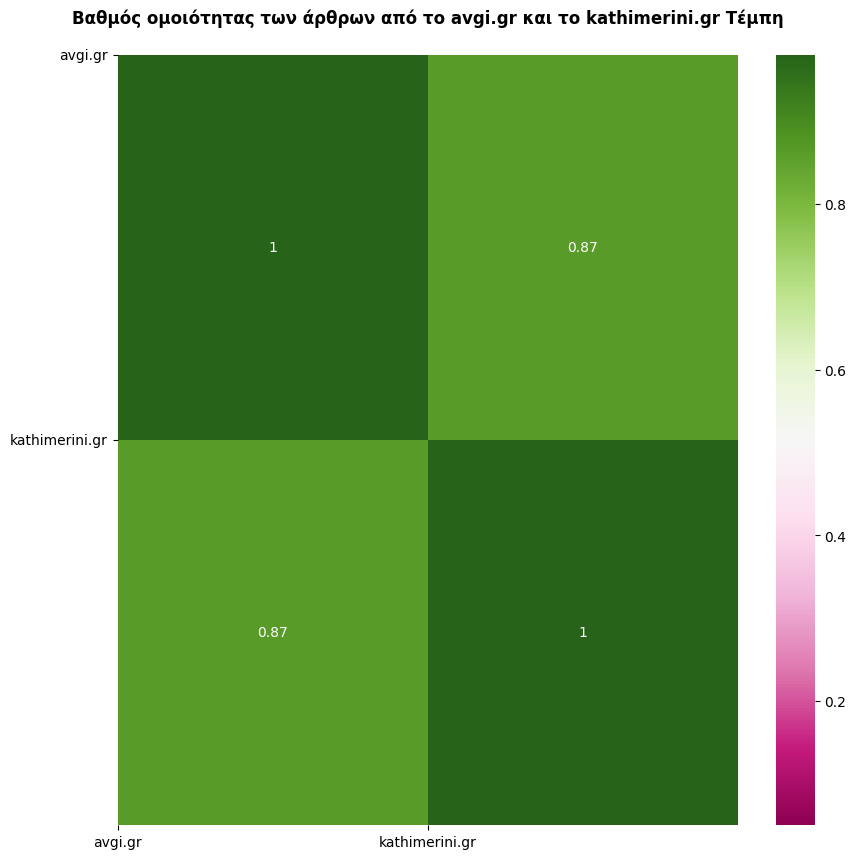

In [33]:
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των άρθρων από το avgi.gr και το kathimerini.gr Τέμπη', y=1.03, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG")
plt.xticks([0, 1], ['avgi.gr', 'kathimerini.gr'])
plt.yticks([0, 1], ['avgi.gr', 'kathimerini.gr'], rotation=0)

